In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline


In [ ]:
def startsWithDateandTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def FindAuthors(s):
    s = s.split(":")
    if len(s) == 2:
        return True
    else:
        return False

In [ ]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthors(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
from google.colab import files
uploaded = files.upload()
data = []
conversation = 'WhatsApp Chat with Unofficial AA1.txt'
with open(conversation, encoding = 'utf-8') as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDateandTime(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

Saving WhatsApp Chat with Unofficial AA1.txt to WhatsApp Chat with Unofficial AA1.txt


In [ ]:
df = pd.DataFrame(data, columns = ['Date','Time', 'Author', 'Message'])
df['Data'] = pd.to_datetime(df['Date'])
df.tail(20)

<ipython-input-7-3362b37d6987>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data'] = pd.to_datetime(df['Date'])


,Date,Time,Author,Message,Data
39977,05/03/2024,11:41,Ritesh Srm,Uske saath khud scam hua hai,2024-05-03
39978,05/03/2024,11:41,Gaurang,Utkarsha,2024-05-03
39979,05/03/2024,11:41,Gaurang,Abb isme hamari galti thodina hai Unke cr me s...,2024-05-03
39980,05/03/2024,11:41,Ritesh Srm,Fr,2024-05-03
39981,05/03/2024,11:41,Ritesh Srm,Dekhte hai shaayad cancel ho jaayega,2024-05-03
39982,05/03/2024,11:41,Ritesh Srm,5 log hai bas,2024-05-03
39983,05/03/2024,11:42,Kshitij,Cancel nahi hori,2024-05-03
39984,05/03/2024,11:43,Ritesh Srm,F,2024-05-03
39985,05/03/2024,11:43,Kshitij,Mein lagwata hun AA1 walo ki,2024-05-03
39986,05/03/2024,11:43,Kshitij,Jo hai nahi idhar,2024-05-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      39997 non-null  object        
 1   Time      39997 non-null  object        
 2   Author    39113 non-null  object        
 3   Message   39997 non-null  object        
 4   Data      39997 non-null  datetime64[ns]
 5   emoji     39997 non-null  object        
 6   urlcount  39997 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39113 entries, 0 to 39996
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      39113 non-null  object        
 1   Time      39113 non-null  object        
 2   Author    39113 non-null  object        
 3   Message   39113 non-null  object        
 4   Data      39113 non-null  datetime64[ns]
 5   emoji     39113 non-null  object        
 6   urlcount  39113 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.4+ MB


In [ ]:
total_messages = df.shape[0]
print(total_messages)

39113


In [ ]:
df.Author.unique()

array(['Soma Ninadh Srm', '+91 79897 67424', None, 'Tarush Srm',
       '+91 78990 10343', '+91 86674 35956', 'Venkat Sai Srm',
       'Ishaan SRM', 'Ritesh Srm', '+91 93478 47569', 'Chandresh Srm',
       'Akash Bunny', '+91 6302 525 535', 'Ranita', '+91 72197 10107',
       '+91 74474 33703', '+91 97977 00986', '+91 94680 06971',
       'Vijay Srm', '+91 73045 90236', '+91 95501 09303',
       '+91 79955 93298', 'Safal', '+91 95000 66126', '+91 6380 382 167',
       'Madhav', 'Anusha SRM', '+91 97251 76301', '+91 90033 16015',
       'Ananya🫀', 'Harsh', 'Rushi Srm', '+91 70139 19558', 'Akash Raheja',
       'Sakshi', '+91 96526 11894', 'Rohit Srm', '+91 90032 07971',
       '+91 75501 70897', '+91 97770 06595', 'Adnan', '+91 98192 40150',
       '+91 95421 55309', 'Arunima', 'Aiswaryaa Rajesh',
       'Ratan Priya Srm', '+91 93133 44737', '+91 99589 65583',
       'Rahul Srm', '+91 6281 019 656', 'Keshav Srm', '+91 93913 72067',
       'Gaurang', '+91 82691 08555', 'Yash College', '+

In [ ]:
media_messages = df[df['Message'] == 'Media omitted>'].shape[0]

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.is_emoji(char) for char in word):
            emoji_list.append(word)

    return emoji_list

df['emoji'] = df['Message'].apply(split_count)
emojis = sum(df['emoji'].str.len())

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x : re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Unofficial AA1")
print("Messages : ", total_messages)
print("Media : ", media_messages)
print("Emojis : ", emojis)
print("Links : ", links)

Unofficial AA1
Messages :  39113
Media :  0
Emojis :  7225
Links :  56


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)

In [ ]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36960 entries, 0 to 39996
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      36960 non-null  object        
 1   Time      36960 non-null  object        
 2   Author    36960 non-null  object        
 3   Message   36960 non-null  object        
 4   Data      36960 non-null  datetime64[ns]
 5   emoji     36960 non-null  object        
 6   urlcount  36960 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df['MessageCount'] = 1

In [ ]:
l = ['Ritesh Srm', 'Kshitij', 'Gaurang']
for i in range(len(l)):
    req_df = messages_df[messages_df['Author'] == l[i]]

    print(f"Stats of {l[i]} : ")

    print("Messages sent : ", req_df.shape[0])

    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print("Words per message : ", words_per_message)

    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print("Media Messages Sent : ", media)

    emojis = sum(req_df['emoji'].str.len())
    print("Emojis sent : ", emojis)

    links = sum(req_df['urlcount'])
    print("Links sent : ", links)

Stats of Ritesh Srm : 
Messages sent :  3514
Words per message :  4.240182128628343
Media Messages Sent :  74
Emojis sent :  433
Links sent :  1
Stats of Kshitij : 
Messages sent :  146
Words per message :  5.171232876712328
Media Messages Sent :  6
Emojis sent :  25
Links sent :  0
Stats of Gaurang : 
Messages sent :  299
Words per message :  7.026755852842809
Media Messages Sent :  42
Emojis sent :  140
Links sent :  8


In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x : x[1], reverse = True)
for i in emoji_dict:
    print(i)

('😂', 1526)
('🥳', 824)
('🎉', 536)
('🎂', 486)
('✨', 313)
('🤣', 292)
('💀', 252)
('🙃', 219)
('🥲', 185)
('😭', 179)
('🙂', 126)
('🎊', 114)
('🎈', 87)
('❤️', 80)
('😔', 57)
('👀', 53)
('🤌', 51)
('👍', 48)
('😏', 46)
('🙄', 44)
('🔥', 39)
('🍰', 38)
('✔️', 35)
('☠️', 34)
('😊', 31)
('🫂', 31)
('💕', 31)
('😌', 29)
('💔', 27)
('😬', 27)
('😒', 26)
('💫', 26)
('😀', 25)
('🤦\u200d♂️', 25)
('🤝', 24)
('😐', 24)
('😑', 24)
('😳', 23)
('🔴', 23)
('🎁', 22)
('🥺', 21)
('😅', 20)
('🌝', 20)
('☹️', 19)
('😶', 19)
('🙆\u200d♂️', 17)
('🤷\u200d♂️', 17)
('☺️', 16)
('🤔', 15)
('🤯', 14)
('❤', 14)
('💯', 14)
('😞', 13)
('🟧', 13)
('😢', 13)
('😗', 13)
('😤', 12)
('🥰', 12)
('😈', 11)
('⬜', 11)
('🥶', 11)
('👍🏻', 11)
('😃', 11)
('🧍', 10)
('🤡', 10)
('😁', 10)
('🛑', 10)
('🥂', 10)
('😄', 9)
('🌟', 9)
('👶', 9)
('😮', 8)
('✌️', 8)
('🟩', 8)
('👌', 8)
('🖕', 8)
('😍', 8)
('🧐', 8)
('😇', 8)
('🔸', 8)
('✋🏻', 8)
('😎', 7)
('🥵', 7)
('⚡', 7)
('👆🏼', 7)
('🤩', 7)
('🔪', 7)
('💥', 7)
('\U0001f979', 7)
('🤨', 6)
('✋', 6)
('👽', 6)
('🕳️', 6)
('🍻', 6)
('🤦', 6)
('💐', 5)
('🐝', 5)
('😫

There are 956109 words in all the messages.


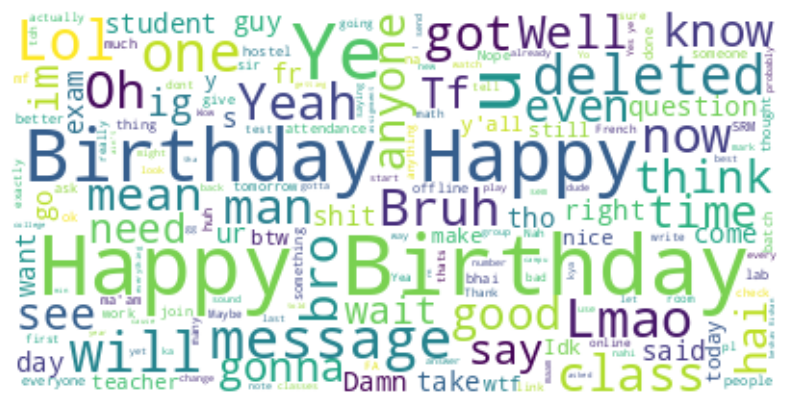

In [ ]:
text = " ".join(review for review in messages_df.Message)
print("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)


plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Author Name Ritesh Srm


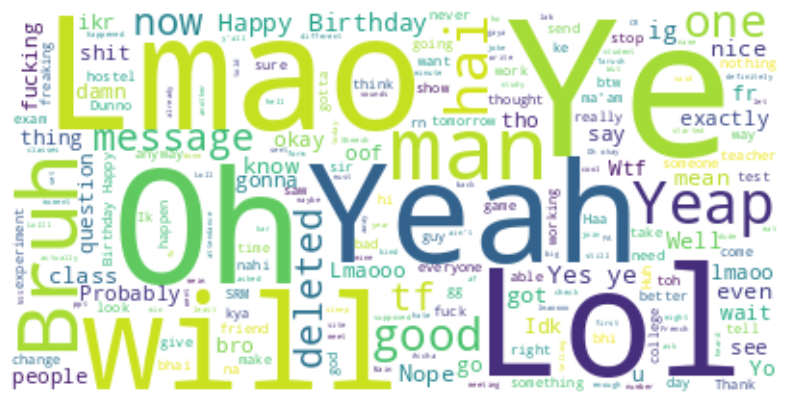

Author Name Kshitij


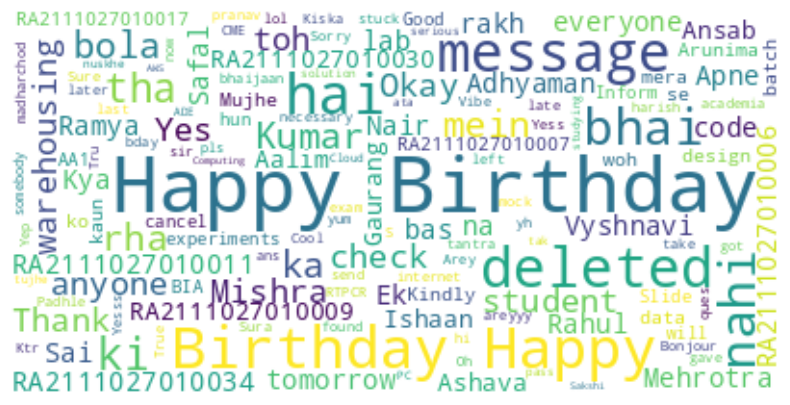

Author Name Gaurang


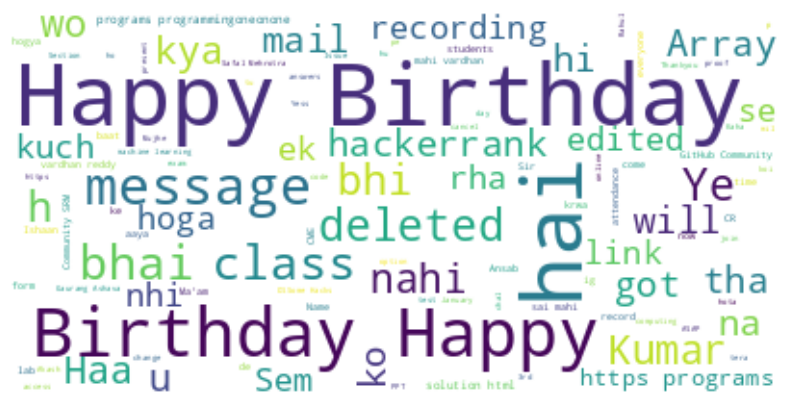

In [ ]:
l = ['Ritesh Srm', 'Kshitij', 'Gaurang']
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)

    print("Author Name", l[i])
    wordcloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)

    plt.figure(figsize = (10,5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()